In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_fname = 'RCTG/pngs/RCTG/1/RCTG_1_1.png'

In [3]:
img = cv.imread(img_fname)

In [4]:
def imshow(image : np.ndarray, title='image', fx=0.25, fy=0.25, use_cv=False):
    if not use_cv:
        image_to_show = image.copy()
        if len(image.shape) == 2 or image.shape[2] == 1:
            image_to_show = cv.cvtColor(image_to_show, cv.COLOR_GRAY2RGB)
        else:
            image_to_show = cv.cvtColor(image_to_show, cv.COLOR_BGR2RGB)
        plt.imshow(image_to_show)
    else:
        cv.imshow(title, cv.resize(image, (0, 0), fx=fx, fy=fy))
        cv.waitKey(0)
        cv.destroyAllWindows()

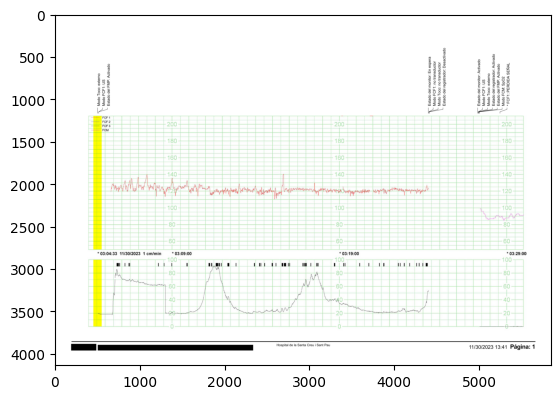

In [5]:
imshow(img, fx=0.2, fy=0.2)

In [6]:
b, g, r = cv.split(img)

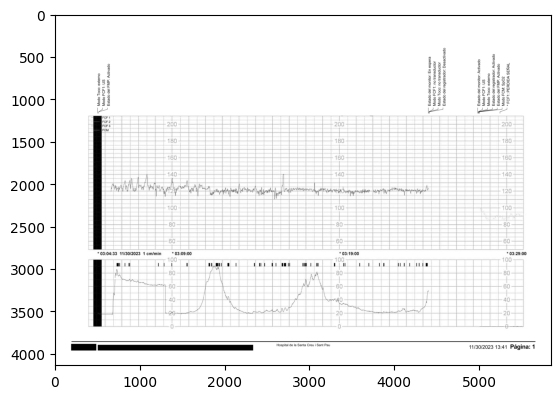

In [7]:
imshow(r, 'r')
imshow(g, 'g')
imshow(b, 'b')

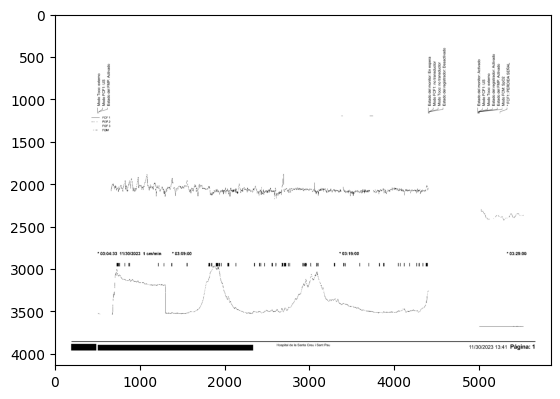

In [8]:
_, g_mask = cv.threshold(g, 150, 255, cv.THRESH_BINARY)
imshow(g_mask)

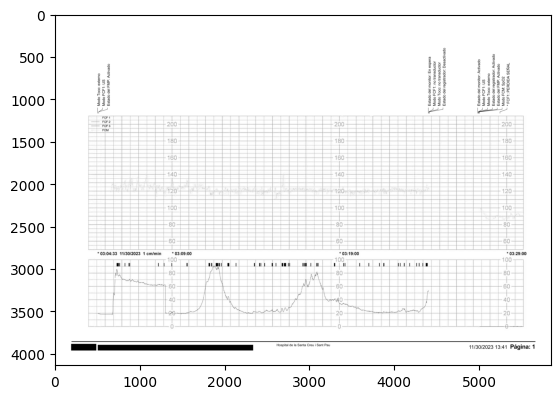

In [9]:
imshow(r, 'r')

In [10]:
r.shape

(4135, 5847)

(4135, 5847)


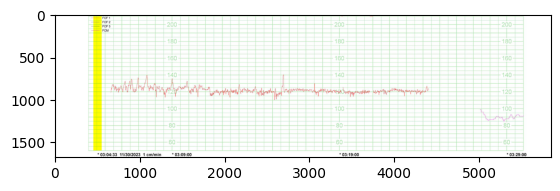

In [11]:
upper_graph_mask = np.uint8(np.zeros(img.shape[:2]))
print(upper_graph_mask.shape)
start = 1175
end = start + 1675
cv.rectangle(upper_graph_mask, (0, start), (img.shape[1], end), 255, -1)
imshow(upper_graph_mask)
upper_graph = cv.bitwise_and(img, img, mask=upper_graph_mask)
# _, upper_graph_mask = cv.threshold(upper_graph_mask, 0, 255, cv.THRESH_BINARY)
upper_graph = upper_graph[start:end, 0:img.shape[1]]
imshow(upper_graph)

In [12]:
upper_graph_b, upper_graph_g, upper_graph_r = cv.split(upper_graph)

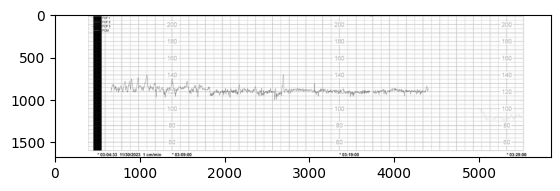

In [13]:
imshow(upper_graph_r, 'upper graph r')
imshow(upper_graph_g, 'upper graph g')
imshow(upper_graph_b, 'upper graph b')

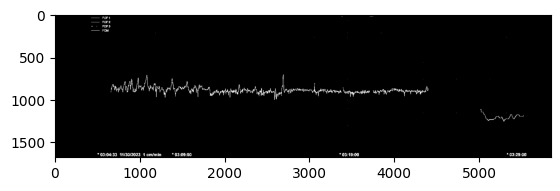

In [14]:
imshow(cv.threshold(upper_graph_g, 200, 255, cv.THRESH_BINARY_INV)[1])

In [15]:
imshow(upper_graph)

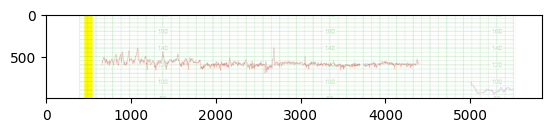

In [16]:
baby_graph_mask = np.uint8(np.zeros(upper_graph.shape[:2]))
start = 315
end = 1300
cv.rectangle(baby_graph_mask, (0, start), (img.shape[1], end), 255, -1)
baby_graph = cv.bitwise_and(upper_graph, upper_graph, mask=baby_graph_mask)
baby_graph = baby_graph[start:end, :]
imshow(baby_graph)

In [17]:
baby_graph_b, baby_graph_g, baby_graph_r = cv.split(baby_graph)

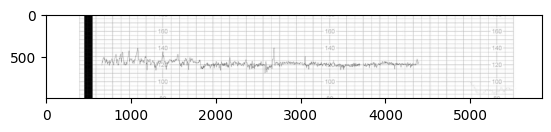

In [18]:
imshow(baby_graph_b)

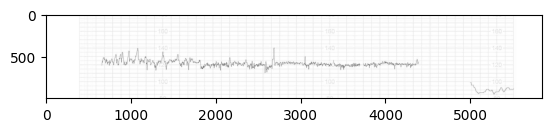

In [19]:
imshow(baby_graph_g)

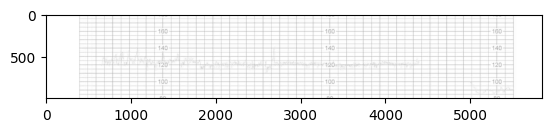

In [20]:
imshow(baby_graph_r)

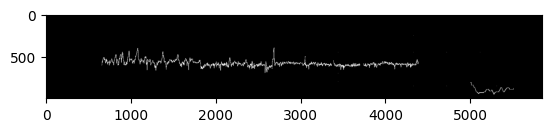

In [21]:
_, th_baby_graph_g = cv.threshold(baby_graph_g, 200, 255, cv.THRESH_BINARY_INV)
imshow(th_baby_graph_g)

In [22]:
_, th_baby_graph_b = cv.threshold(baby_graph_b, 189, 255, cv.THRESH_BINARY_INV)
imshow(th_baby_graph_b)

In [23]:
th_baby_graph = cv.bitwise_and(th_baby_graph_b, th_baby_graph_g)
imshow(th_baby_graph)

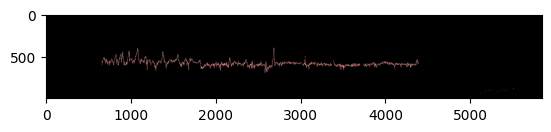

In [24]:
baby_graph_only = cv.bitwise_and(baby_graph, baby_graph, mask=th_baby_graph)
imshow(baby_graph_only)

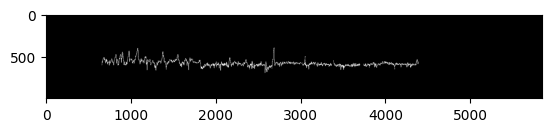

In [25]:
contours, _ = cv.findContours(th_baby_graph, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = [ c for c in contours if cv.contourArea(c) >= 100 ]

baby_contour = np.uint8(np.zeros(th_baby_graph.shape))
cv.drawContours(baby_contour, contours, -1, 255, -1)
imshow(baby_contour)

In [53]:
def get_white_contour_points(img, csv_fname=''):
    data = {}
    white_pixels = np.argwhere(img == 255)

    for y, x in white_pixels:
        if x not in data:
            data[x] = [ y ]
        else:
            data[x] += [ y ]

    data_points = [ ( x, np.average(ys).astype(np.int64) ) for x, ys in data.items() ]

    if csv_fname != '':
        with open(csv_fname, 'w') as f:
            f.write('x,y\n')
            for x, y in sorted(data_points, key=lambda x: x[0]):
                f.write(f'{x},{y}\n')

    return data_points

In [54]:
baby_data_points = get_white_contour_points(baby_contour, 'holabebe.csv')

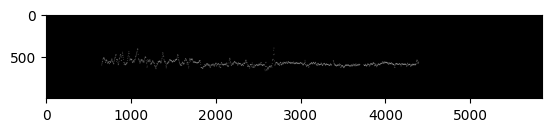

In [56]:
black = np.uint8(np.zeros(baby_contour.shape[:2]))
for x, y in baby_data_points:
    black[y, x] = 255
black = cv.dilate(black, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))
imshow(black)

# Contracture extraction (me duele la espalda para los que no sepan ingles)

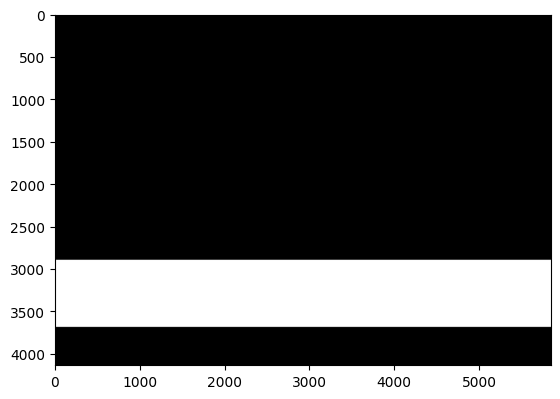

In [31]:
contraction_mask = np.uint8(np.zeros(img.shape[:2]))
contraction_graph_start = 2895
contraction_graph_end = 3685
cv.rectangle(contraction_mask, (0, contraction_graph_start), (img.shape[1], contraction_graph_end), 255, -1)
imshow(contraction_mask, fx=0.2, fy=0.2)

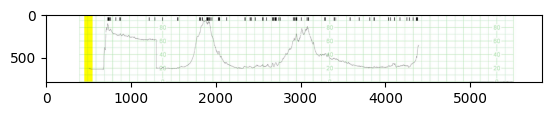

In [32]:
contraction_graph = cv.bitwise_and(img, img, mask=contraction_mask)
contraction_graph = contraction_graph[contraction_graph_start:contraction_graph_end, :]
imshow(contraction_graph)

In [33]:
contraction_graph_b, contraction_graph_g, contraction_graph_r = cv.split(contraction_graph)
# imshow(contraction_graph_r, 'contraction_graph_r', use_cv=True)
# imshow(contraction_graph_g, 'contraction_graph_g', use_cv=True)
# imshow(contraction_graph_b, 'contraction_graph_b', use_cv=True)

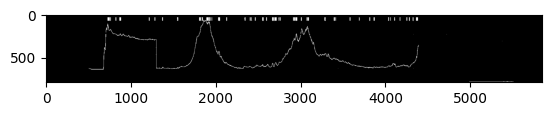

In [34]:
_, th_contraction_graph = cv.threshold(contraction_graph_g, 200, 255, cv.THRESH_BINARY_INV)
imshow(th_contraction_graph)

In [35]:
contraction_contours, _ = cv.findContours(th_contraction_graph, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_cpy = np.zeros((*th_contraction_graph.shape[:2], 3))
contraction_contours = sorted(contraction_contours, key=lambda x : cv.contourArea(x), reverse=True)
contraction_contours = [ x for x in contraction_contours if cv.contourArea(x) >= 100 ]
cv.drawContours(img_cpy, contraction_contours, 0, (0, 0, 255))
imshow(img_cpy)

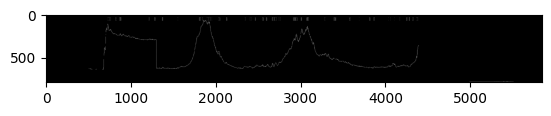

In [48]:
_, th_contraction_graph_2 = cv.threshold(contraction_graph_g, 0, 255, cv.THRESH_OTSU)
th_contraction_graph_2 = cv.bitwise_not(th_contraction_graph_2, th_contraction_graph_2)

contraction_graph_filtered = cv.bitwise_and(contraction_graph_g, contraction_graph_g, mask=th_contraction_graph_2)
imshow(contraction_graph_filtered)

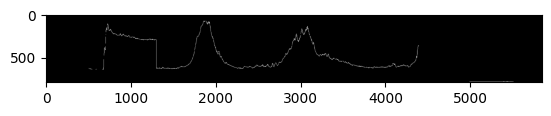

In [61]:
contraction_graph_mask = np.uint8(np.zeros(contraction_graph_filtered.shape))
cv.rectangle(contraction_graph_mask, (0, 80), contraction_graph_mask.shape[::-1], 255, -1)

contraction_graph_final = cv.bitwise_and(contraction_graph_filtered, contraction_graph_filtered, mask=contraction_graph_mask)
_, contraction_graph_final = cv.threshold(contraction_graph_final, 0, 255, cv.THRESH_BINARY)
imshow(contraction_graph_final)

In [64]:
contraction_data_points = get_white_contour_points(contraction_graph_final, 'contraction_points.csv')
len(contraction_data_points)

4260

In [63]:
black = np.uint8(np.zeros(contraction_graph_final.shape[:2]))
for x, y in contraction_data_points:
    black[y, x] = 255

black = cv.dilate(black, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))
imshow(black, use_cv=True)